<a href="https://colab.research.google.com/github/IvanGomez37/Final-Project-FoML/blob/main/seoul_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing, Initializing the .csv via Drive**

In [238]:
''' Unncoment if working in VSC
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
'''

' Unncoment if working in VSC\n# libraries for the files in google drive\nfrom pydrive.auth import GoogleAuth\nfrom google.colab import drive\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\n'

In [239]:
''' Unncoment if working in VSC
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1Px7HKM8lKoaLgMnMDPGkrQWVdfODCOmt'
download = drive.CreateFile({'id': file_id})
download.GetContentFile('SeoulBikeData.csv')
df = pd.read_csv("SeoulBikeData.csv", encoding='latin-1')
'''

' Unncoment if working in VSC\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\nfile_id = \'1Px7HKM8lKoaLgMnMDPGkrQWVdfODCOmt\'\ndownload = drive.CreateFile({\'id\': file_id})\ndownload.GetContentFile(\'SeoulBikeData.csv\')\ndf = pd.read_csv("SeoulBikeData.csv", encoding=\'latin-1\')\n'

# **Setting up the dataset**

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [241]:
# Reading csv file
SeoulBikeData = pd.read_csv('./SeoulBikeData.csv', encoding='latin-1') # Comment if working in Colab

## Initial data basic information

In [242]:
# Dataframe top rows
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [243]:
# Printing basic data info
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Object data type transformation

*We need to convert the object parameters to integer parameters*


In [244]:
# Creating secondary dataframe to not alter original one.
# Also rearange of columns order: categorical | continuous | target
SeoulBikeData_transformed = SeoulBikeData[['Date',
                                           'Hour',
                                           'Seasons',
                                           'Holiday',
                                           'Functioning Day',
                                           'Temperature(°C)',
                                           'Humidity(%)',
                                           'Wind speed (m/s)',
                                           'Visibility (10m)',
                                           'Dew point temperature(°C)',
                                           'Solar Radiation (MJ/m2)',
                                           'Rainfall(mm)',
                                           'Snowfall (cm)',
                                           'Rented Bike Count']]

In [245]:
# Factorizing object data type columns: Seasons, Holiday, Fuctioning Day
SeoulBikeData_transformed[['Seasons', 'Holiday', 'Functioning Day']] = SeoulBikeData_transformed[['Seasons', 'Holiday', 'Functioning Day']].apply(lambda x: pd.factorize(x)[0])

*For the Date parameter we need to use a different way to convert the object to a integer due to the information it has.*



In [246]:
# Transforming Date string to datetime data type
SeoulBikeData_transformed['Date'] = pd.to_datetime(SeoulBikeData_transformed['Date'], format='%d/%m/%Y')

# Obtaining month and day of the week for each date
SeoulBikeData_transformed['Month'] = (SeoulBikeData_transformed['Date'].dt.strftime('%m')).astype(int)
SeoulBikeData_transformed['Week Day'] = pd.factorize(SeoulBikeData_transformed['Date'].dt.day_name())[0]

# Inserting new columns in correct order
SeoulBikeData_transformed.insert(1, 'Month', SeoulBikeData_transformed.pop('Month'))
SeoulBikeData_transformed.insert(2, 'Week Day', SeoulBikeData_transformed.pop('Week Day'))

SeoulBikeData_transformed.head()

#do we pop the date feature?

,Date,Month,Week Day,Hour,Seasons,Holiday,Functioning Day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,2017-12-01,12,0,0,0,0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,2017-12-01,12,0,1,0,0,0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,2017-12-01,12,0,2,0,0,0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,2017-12-01,12,0,3,0,0,0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,2017-12-01,12,0,4,0,0,0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78


In [247]:
# Updated data types
SeoulBikeData_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Month                      8760 non-null   int32         
 2   Week Day                   8760 non-null   int64         
 3   Hour                       8760 non-null   int64         
 4   Seasons                    8760 non-null   int64         
 5   Holiday                    8760 non-null   int64         
 6   Functioning Day            8760 non-null   int64         
 7   Temperature(°C)            8760 non-null   float64       
 8   Humidity(%)                8760 non-null   int64         
 9   Wind speed (m/s)           8760 non-null   float64       
 10  Visibility (10m)           8760 non-null   int64         
 11  Dew point temperature(°C)  8760 non-null   float64       
 12  Solar 

# **Exploring the dataset**


## Initial description

In [248]:
# Brief data statistical summary
SeoulBikeData_transformed.describe()

,Date,Month,Week Day,Hour,Seasons,Holiday,Functioning Day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,6.526027,2.991781,11.500000,1.504110,0.049315,0.033676,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,704.602055
min,2017-12-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,4.000000,1.000000,5.750000,1.000000,0.000000,0.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,191.000000
50%,2018-06-01 00:00:00,7.000000,3.000000,11.500000,2.000000,0.000000,0.000000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,504.500000
75%,2018-08-31 00:00:00,10.000000,5.000000,17.250000,2.000000,0.000000,0.000000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,1065.250000
max,2018-11-30 00:00:00,12.000000,6.000000,23.000000,3.000000,1.000000,1.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3556.000000
std,NaN,3.448048,2.003519,6.922582,1.114408,0.216537,0.180404,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,644.997468


## Separation of data features and target values

In [249]:
# Obtaining target values column
SeoulBikeData_transformed_target = SeoulBikeData_transformed["Rented Bike Count"]

# Obtaining features dataframe
SeoulBikeData_transformed_features = SeoulBikeData_transformed.drop(columns=["Rented Bike Count"])

# Lists for feature type
discrete_features = ['Month', 'Week Day','Hour','Seasons', 'Holiday', 'Functioning Day']
continuous_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

## Feature understanding

### Discrete features barplot

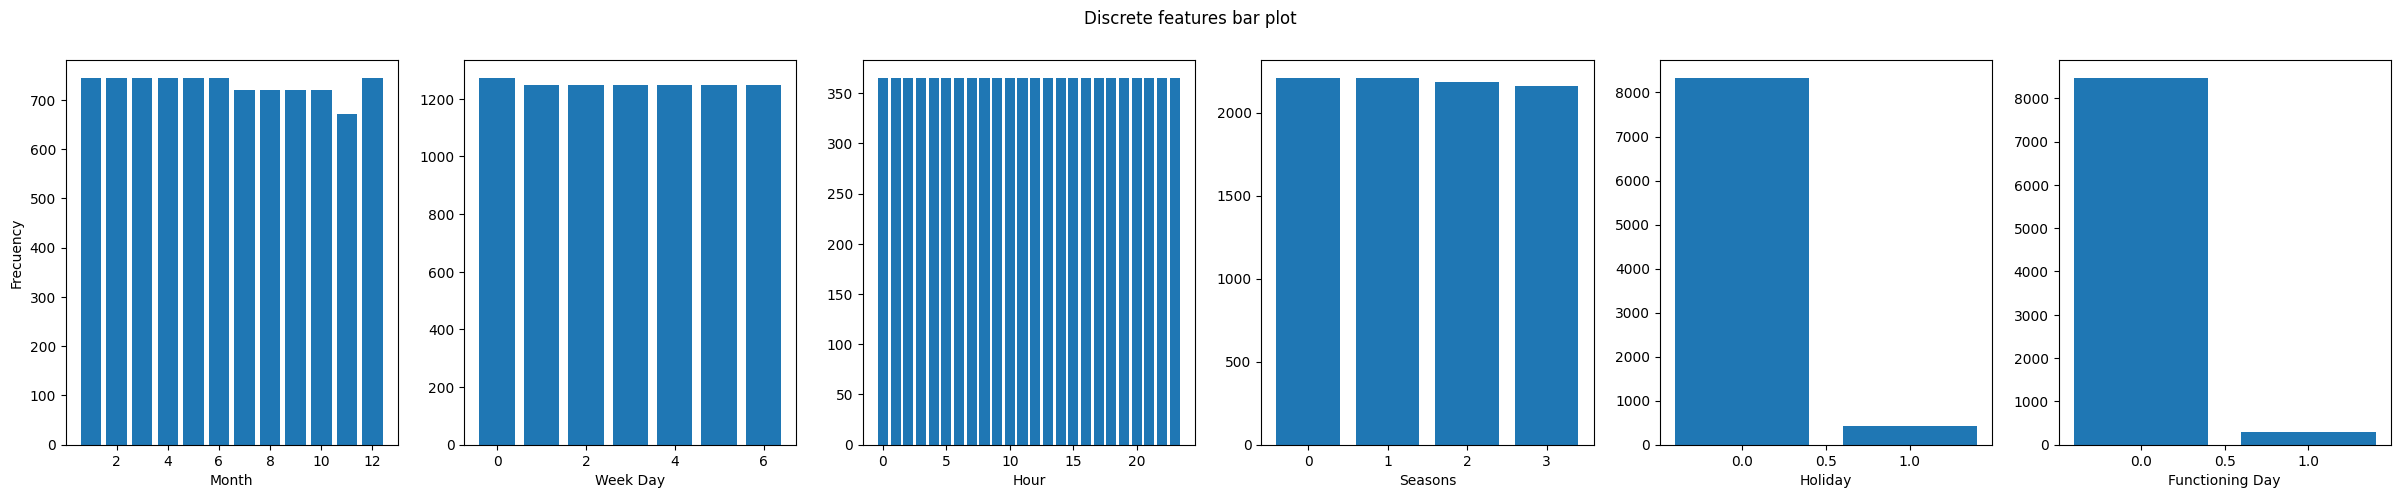

In [250]:
# Function to generate barplot
def discrete_features_barplot(data, data_cols):
    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data_cols):
        axs[i].bar(data[data_col].unique(), data[data_col].value_counts())

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        axs[i].set_xlabel(data_col)
        
    return fig

# Plotting barplot
discrete_barplot = discrete_features_barplot(SeoulBikeData_transformed, discrete_features)
plt.suptitle("Discrete features bar plot")
plt.show()

### Continuous features histogram

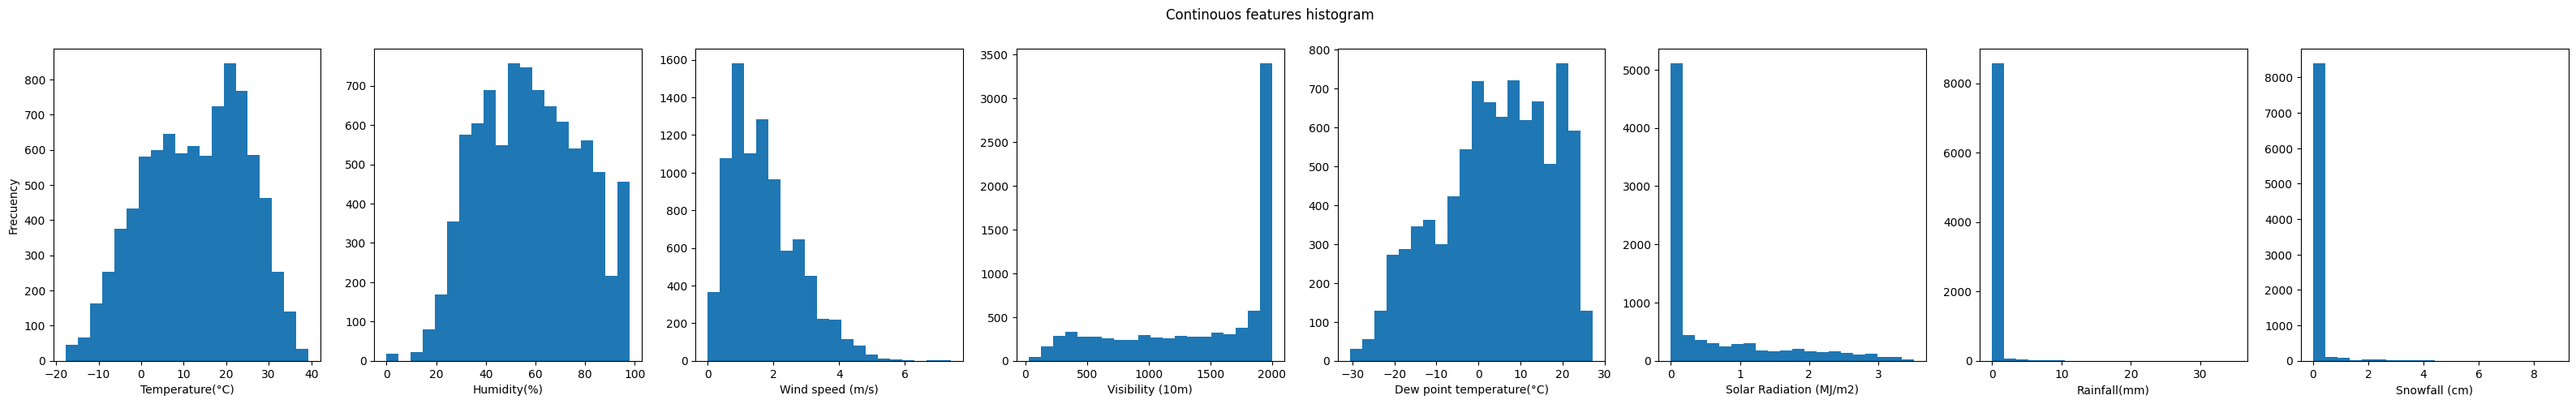

In [251]:
# Function to generate histogram
def continous_features_histogram(data, data_cols, n_bins):
    # Number of features
    num_col = len(data_cols)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data_cols):
        axs[i].hist(data[data_col], bins = n_bins)

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        axs[i].set_xlabel(data_col)
        
    return fig

# Plotting histogram
continuous_histogram = continous_features_histogram(SeoulBikeData_transformed, continuous_features, 20)
plt.suptitle("Continouos features histogram")
plt.show()

### KDE Distribution plot

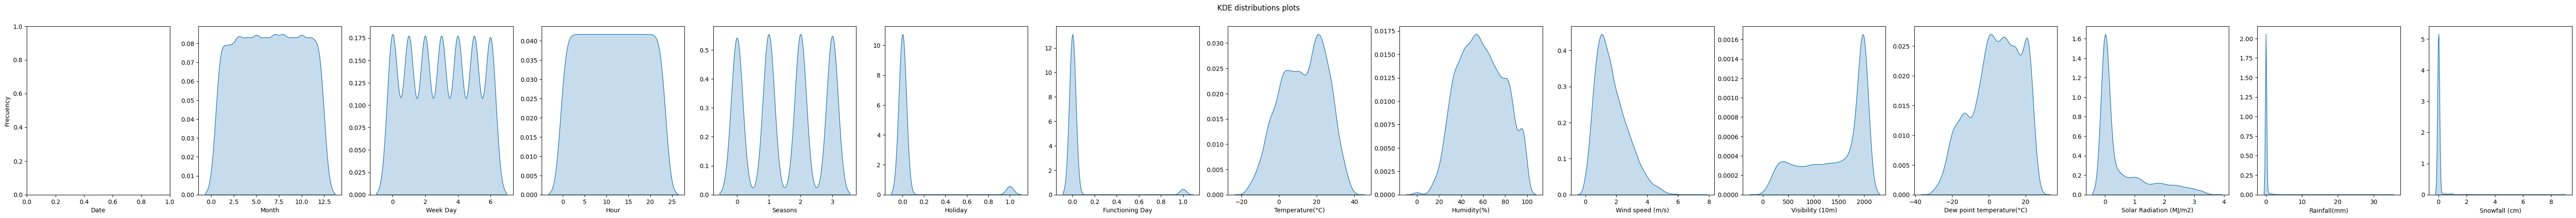

In [252]:
# To surpress annoying warnings
import warnings

# Function to generate KDE plots
def kde_plot(data):
    # Dropping Date column because of unssuported data type
    #data = data.drop(["Date"], axis=1)

    # Number of features
    num_col = data.shape[1]

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, data_col in zip(range(num_col), data.columns):
        warnings.filterwarnings('ignore')
        if(data_col != "Date"):
            sns.kdeplot(data[data_col], ax=axs[i], fill = True)

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel("Frecuency")
        else: axs[i].set_ylabel("")
        axs[i].set_xlabel(data_col)
        
    return fig

# Plotting Kde
kde_plotted = kde_plot(SeoulBikeData_transformed_features)
plt.suptitle("KDE distributions plots")
plt.show()

## Feature Relationships

### Data correlation matrix

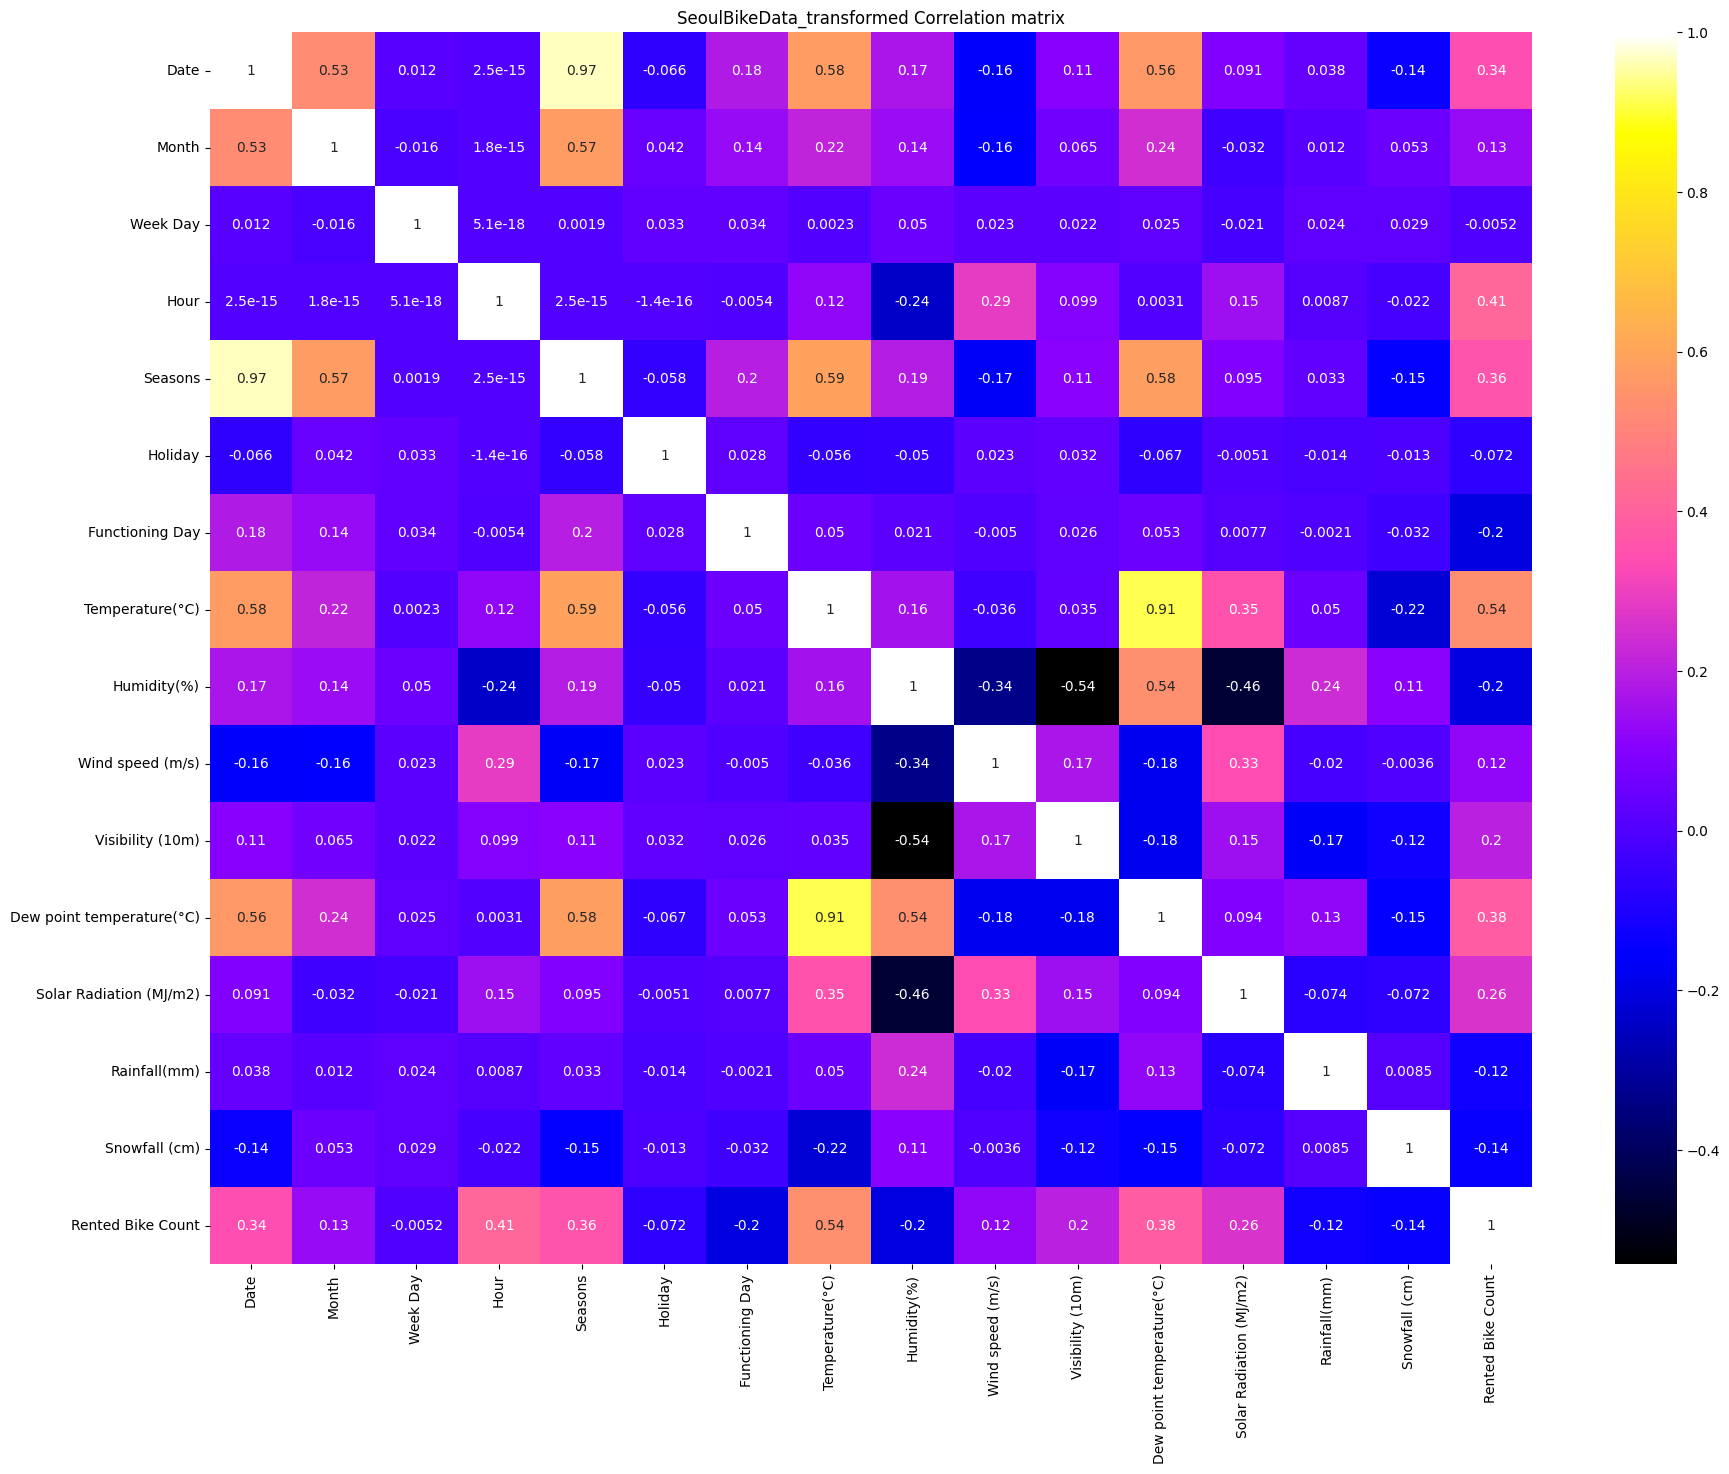

In [253]:
# (? Target value se toma en cuenta en correlation matrix?)
# Generating Correlation matrix of SeoulBikeData_transformed
correlation_matrix = SeoulBikeData_transformed.corr()

# Plotting Correlation matrix
num_rows, num_cols = SeoulBikeData_transformed.shape
plt.figure(figsize=(num_cols + (num_cols / 3), num_cols))
plt.title("SeoulBikeData_transformed Correlation matrix")
ax = sns.heatmap(correlation_matrix, annot = True, cmap= 'gnuplot2')
plt.show()

### Features scatterplot matrix

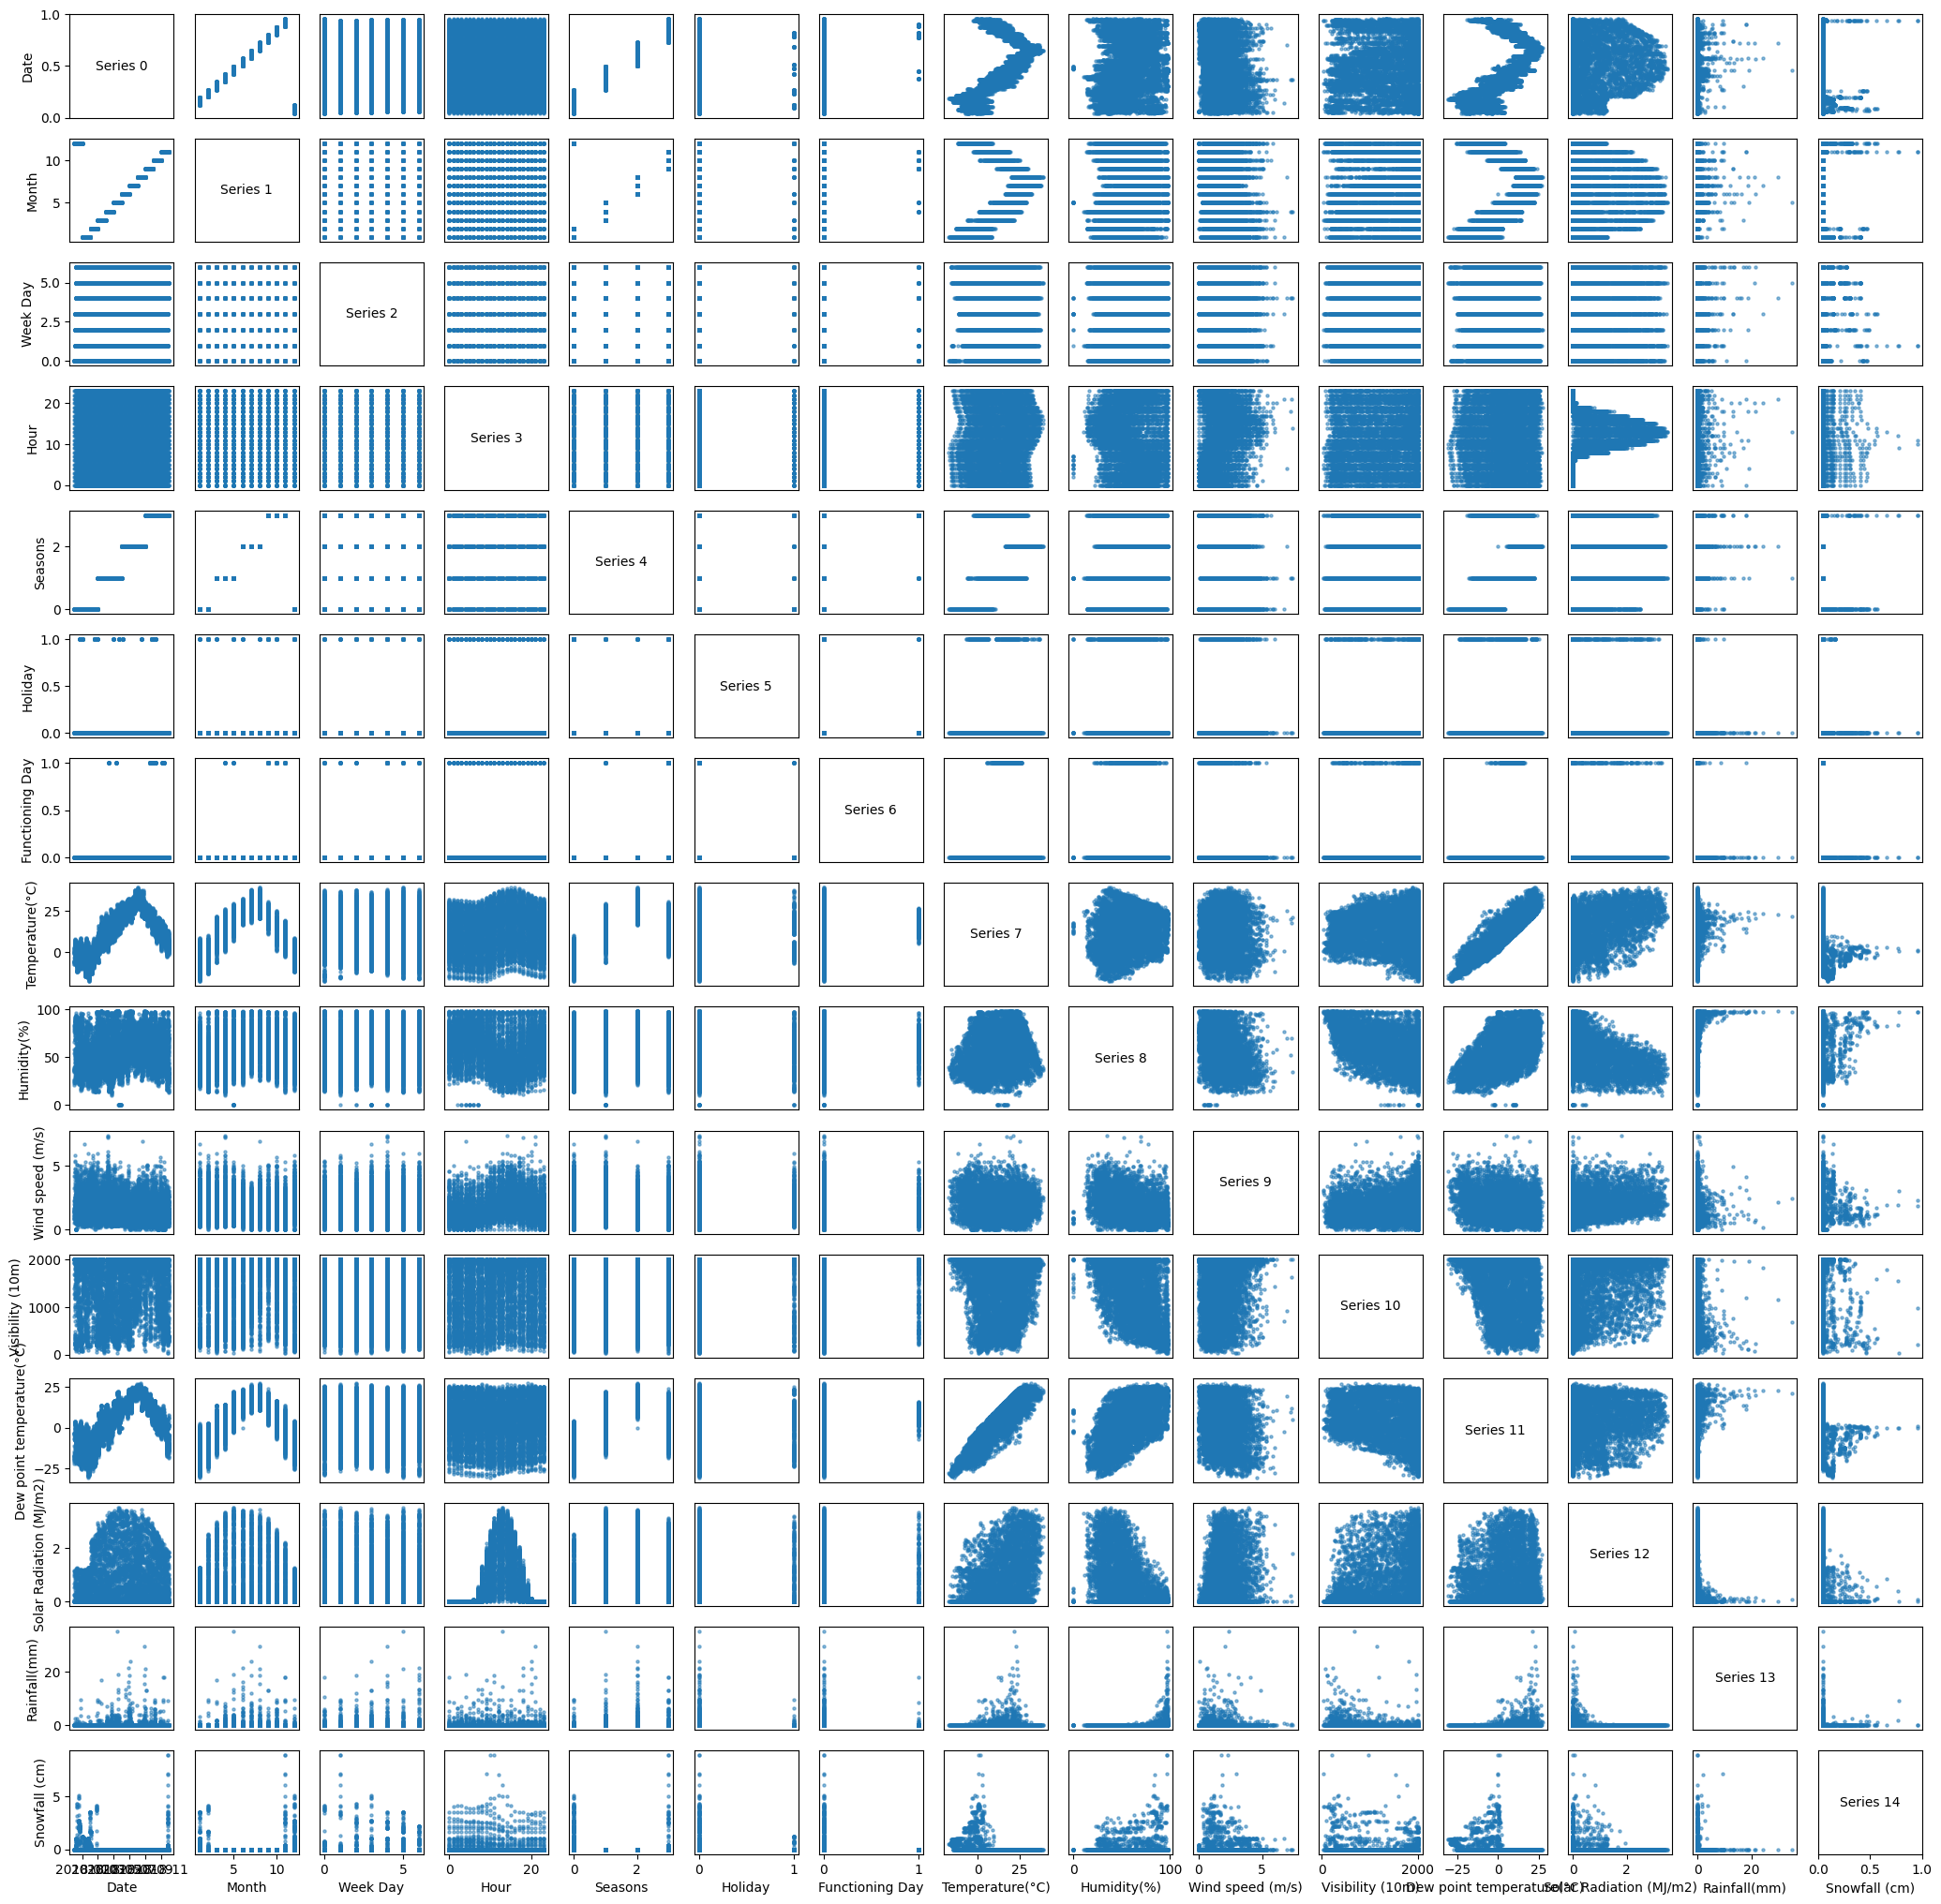

In [254]:
# (? Como interpretar relaciones)
# Function to generate scatterplot matrix
def scatterplot_matrix(data):
    num_col = data.shape[1]

    fig, axs = plt.subplots(num_col, num_col, figsize=(num_col * 1.7, num_col * 1.7))
    
    for i, col_name_i in zip(range(num_col), data.columns):
        for j, col_name_j in zip(range(num_col), data.columns):
            # Either plot scatter or print number of serie
            if i != j: axs[i, j].scatter(data[col_name_j], data[col_name_i], s = 5, alpha=0.5)
            else: axs[i, j].annotate(f"Series {i}", (0.5, 0.5), xycoords='axes fraction', ha="center", va="center")

            # Setting rows and columns shared labels
            if j == 0: axs[i, j].set_ylabel(col_name_i)
            if i == num_col - 1: axs[i, j].set_xlabel(col_name_j)

            # Hide axis labels except for left and bottom charts
            if i < num_col - 1: axs[i][j].xaxis.set_visible(False)
            if j > 0: axs[i][j].yaxis.set_visible(False)

    return fig

# Plotting scatterplot matrix
scatter_matrix = scatterplot_matrix(SeoulBikeData_transformed_features)
plt.show()

### Continuous features KDE pairplot 

In [255]:
# (? Como interpretar)
# Creating KDE pairplot
'''features_pairplot = sns.pairplot(SeoulBikeData_transformed_features,
                                 kind="kde",
                                 x_vars= continuous_features,
                                 y_vars=continuous_features,
                                 corner=True)'''

'features_pairplot = sns.pairplot(SeoulBikeData_transformed_features,\n                                 kind="kde",\n                                 x_vars= continuous_features,\n                                 y_vars=continuous_features,\n                                 corner=True)'

### Discrete features boxplot

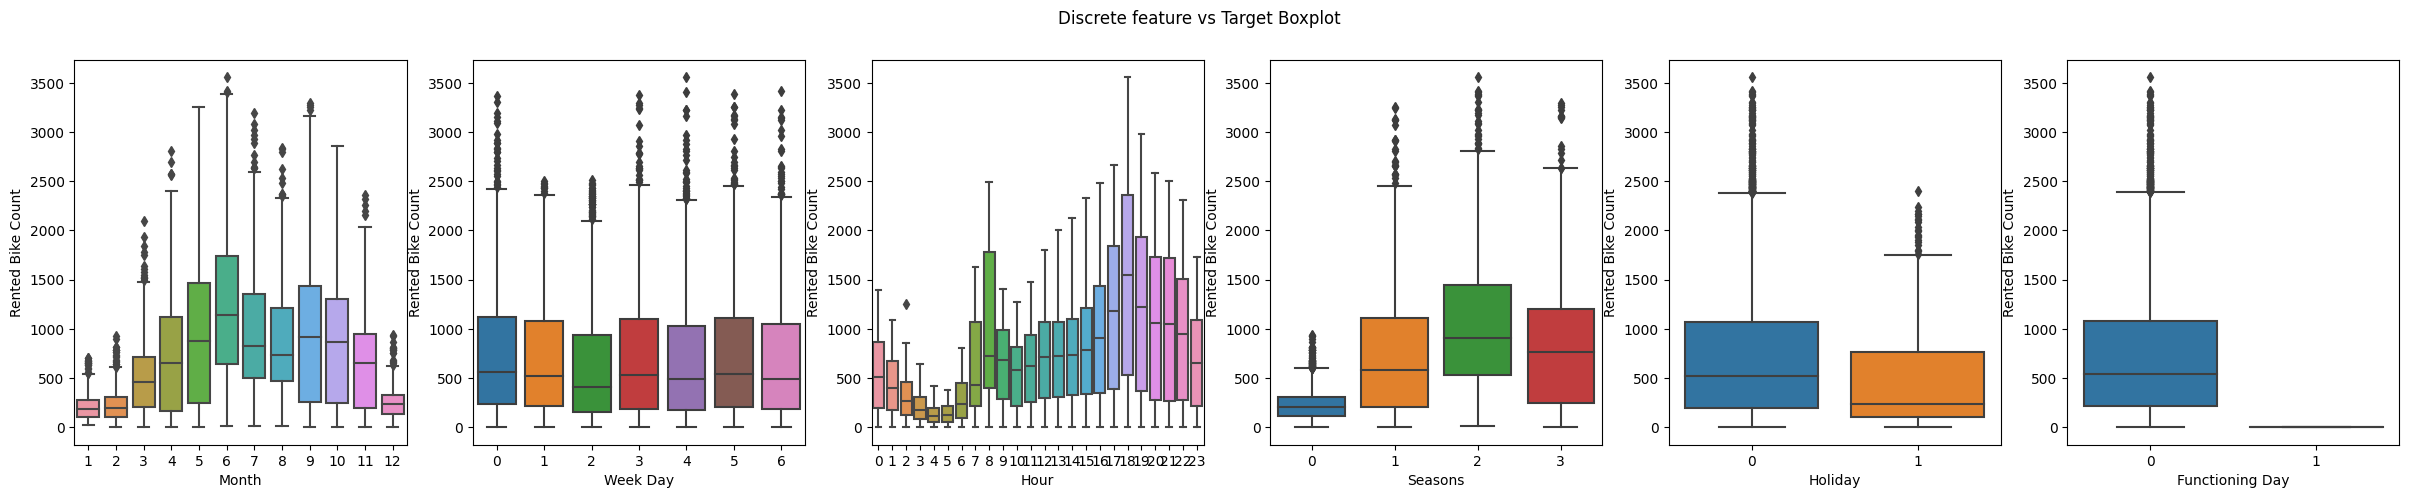

In [256]:
# (? Date es categorica o continua)
# Function to generate Boxplot
def discrete_box_plot(data, features_list):
    # Number of features
    num_col = len(features_list)

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, col_name_i in zip(range(num_col), features_list):
        # Heatmap plotting
        sns.boxplot(ax=axs[i], x=col_name_i, y = 'Rented Bike Count', data = data)
        

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel('Rented Bike Count')
        axs[i].set_xlabel(col_name_i)
        
    return fig

# Plotting discrete features boxplot
discrete_box = discrete_box_plot(SeoulBikeData_transformed, discrete_features)
plt.suptitle("Discrete feature vs Target Boxplot")
plt.show()



### Features vs Target value (Rented Bike Count) relation

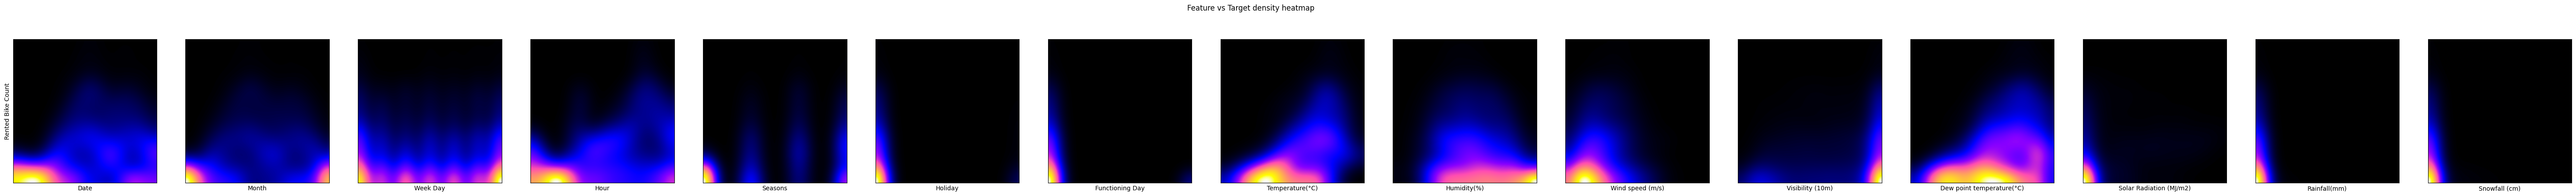

In [257]:
from scipy.ndimage import gaussian_filter

# Function to generate heatmaps of features vs target
def features_target_plot(data_features, data_target, s, bins = 1000):
    # Number of features
    num_col = data_features.shape[1]

    # Creating subplots
    fig, axs = plt.subplots(1, num_col, figsize=(num_col * 5, 5))
    
    # Plotting for each feature
    for i, col_name_i in zip(range(num_col), data_features.columns):
        # Heatmap plotting
        heatmap, x, y = np.histogram2d(data_features[col_name_i], data_target, bins = bins)
        heatmap = gaussian_filter(heatmap, sigma = s)
        axs[i].imshow(heatmap.T, origin='lower', cmap = 'gnuplot2')
        axs[i].axes.yaxis.set_ticks([])
        axs[i].axes.xaxis.set_ticks([])

        # Setting rows and columns shared labels
        if i == 0: axs[i].set_ylabel(data_target.name)
        axs[i].set_xlabel(col_name_i)
    return fig

# Plotting features vs target heatmaps
features_target = features_target_plot(SeoulBikeData_transformed_features, SeoulBikeData_transformed_target, 64)
plt.suptitle("Feature vs Target density heatmap")
plt.show()

### Joint plots (can't be used with subplots, plot only if needed)

In [258]:
# Function to generate joinplots 
def joint_matrix(data):
    num_col = data.shape[1]
    
    for i, col_name_i in zip(range(num_col), data.columns):
        for j, col_name_j in zip(range(num_col), data.columns):
            # Plotting individual jointplots
            if i != j: sns.jointplot(x = col_name_i, y = col_name_j, data = data, kind = 'hex')

# Plotting jointplot (uncomment to plot)
#joint_matrix(SeoulBikeData_transformed_features.drop('Date', axis=1))
#plt.show()

### Normalization

In [259]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [260]:
SeoulBikeData_transformed.head()

,Date,Month,Week Day,Hour,Seasons,Holiday,Functioning Day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,2017-12-01,12,0,0,0,0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,2017-12-01,12,0,1,0,0,0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,2017-12-01,12,0,2,0,0,0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,2017-12-01,12,0,3,0,0,0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,2017-12-01,12,0,4,0,0,0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78


In [261]:
SeoulBikeData_transformed_features = SeoulBikeData_transformed_features.drop(['Date'], axis=1)
X = SeoulBikeData_transformed_features
y = SeoulBikeData_transformed_target

In [262]:

norm = MinMaxScaler().fit(X)

X_norm = norm.transform(X)

X_norm = pd.DataFrame(X_norm, columns=X.columns)

### Training, testing and validation dataset split

In [263]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and temporary (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_norm, y, test_size=0.4, random_state=42)

# Splitting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.describe()


,Month,Week Day,Hour,Seasons,Holiday,Functioning Day,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000,5256.000000
mean,0.501574,0.498573,0.500968,0.505835,0.050228,0.035388,0.537398,0.592365,0.234576,0.715407,0.599899,0.166854,0.004148,0.008224
std,0.312724,0.333766,0.298489,0.371929,0.218437,0.184776,0.208090,0.208258,0.140136,0.309960,0.223756,0.250563,0.029565,0.050267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005245,0.000000,0.000000,0.003041,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.166667,0.260870,0.333333,0.000000,0.000000,0.375437,0.428571,0.135135,0.463127,0.453287,0.000000,0.000000,0.000000
50%,0.545455,0.500000,0.521739,0.666667,0.000000,0.000000,0.551573,0.581633,0.202703,0.851495,0.615917,0.002841,0.000000,0.000000
75%,0.818182,0.833333,0.739130,1.000000,0.000000,0.000000,0.704983,0.755102,0.310811,1.000000,0.782007,0.276278,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.993007,1.000000,1.000000,1.000000,0.993080,1.000000,0.685714,1.000000


### Linear Regression Model

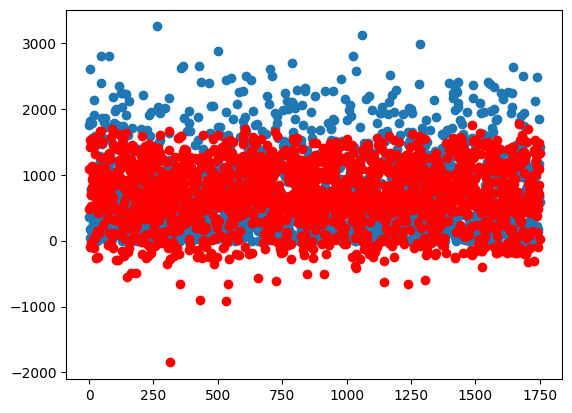

Mean Squared Error: 200176.29032448743
R-squared: 0.5051067387315644
Coefficients: 
 [  -11.93731103    37.08791165   661.81134904   346.58203595
  -141.25487952  -938.05663407  1222.38691507  -915.10710933
   148.59112632   -21.92163718   271.08249874  -261.93363625
 -2361.81787536   129.37979922]
Coefficient of determination: 0.51
Mean Squared Error: 200185.87785388128


In [264]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

prediction = regr.predict(X_test)

plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(prediction)), prediction, c='red')
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print("Coefficients: \n", regr.coef_)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, prediction))


# Convert predictions to binary values (e.g., rounding to the nearest integer)
y_val_pred_binary = np.round(prediction).astype(int)

# We won't calculate the accuracy beucase it doesn't make sense for regression problems
#instead we will calculate the mean squared error
mse = mean_squared_error(y_test, y_val_pred_binary)
#accuracy = accuracy_score(y_test, y_val_pred_binary)
print(f"Mean Squared Error: {mse}")


We can see that the performance of this regression model is not working as expected. 

### Trying a Multiple Linear Regression

Mean Squared Error: 197393.94383508185
R-squared: 0.5262313061537472


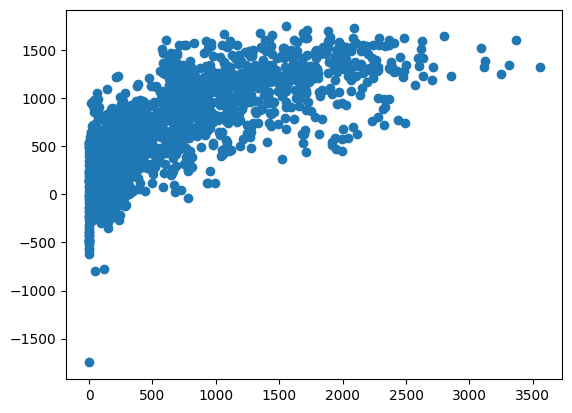

In [265]:
#Let's try with a different model and see if we can improve the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred)
plt.show()

Let's try to make a reduced model by looking at less features and choosing the most important ones. Also looking for a summary of the months and days of the week.

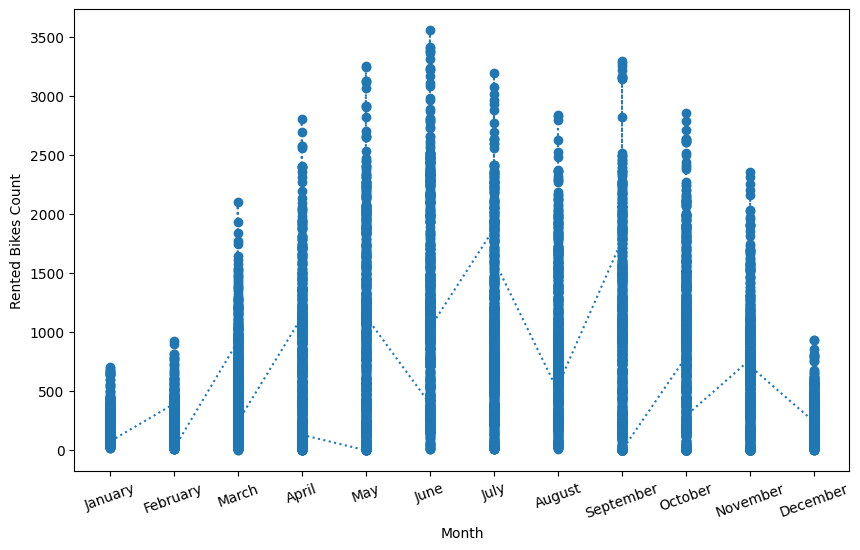

In [266]:
import calendar
data = pd.concat([SeoulBikeData_transformed_target, SeoulBikeData_transformed_features['Month']], axis=1)
# Sort the data by 'Month' for proper plotting
data = data.sort_values('Month')
month_names = data['Month'].unique()
month_mapping = {month: i for i, month in enumerate(month_names)}
data['Month'] = data['Month'].map(month_mapping)
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Rented Bike Count'], marker='o', linestyle=':')
plt.xlabel('Month')
plt.xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
plt.ylabel('Rented Bikes Count')
plt.show()


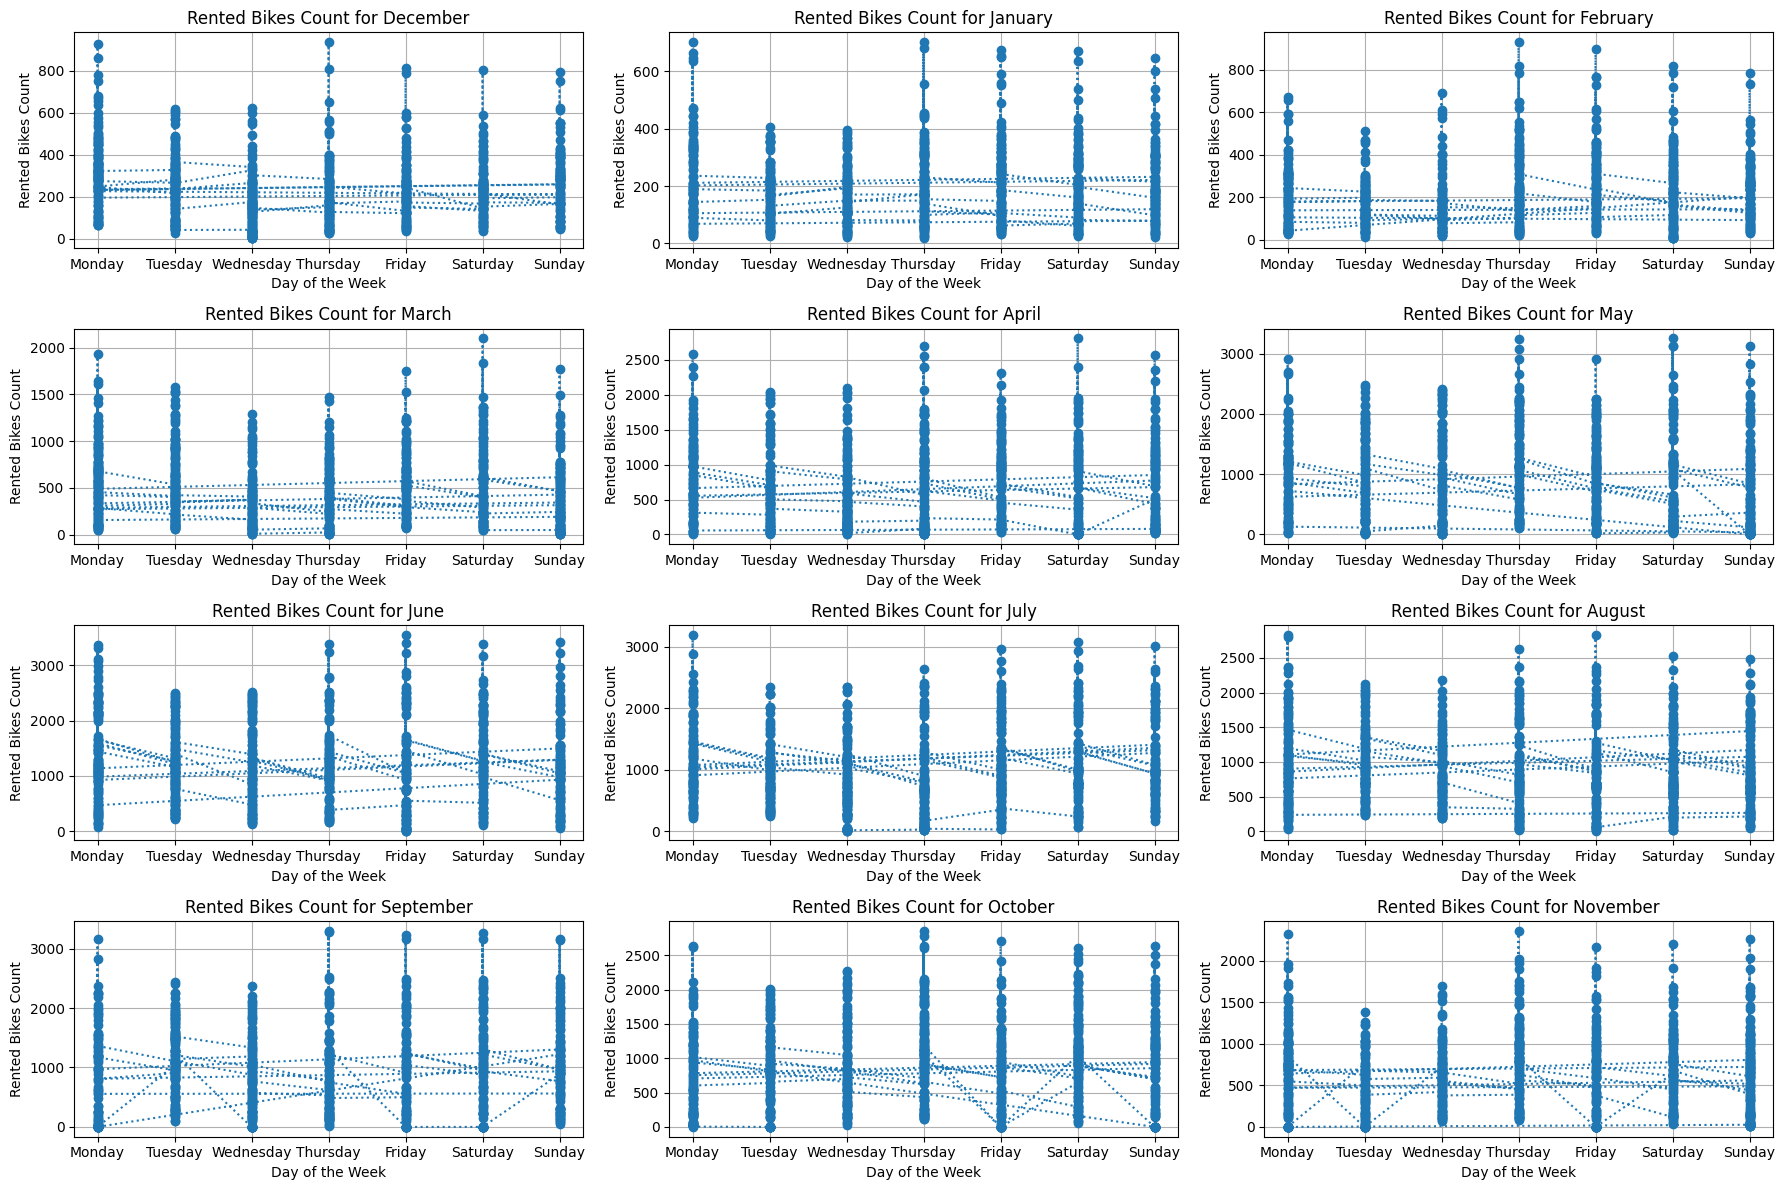

In [267]:
data = pd.concat([SeoulBikeData_transformed_target, SeoulBikeData_transformed_features['Month'], SeoulBikeData_transformed_features['Week Day']], axis=1)
data['Month'] = data['Month'].apply(lambda x: calendar.month_name[x])
unique_months = data['Month'].unique()
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))
axes = axes.flatten()
for i, month in enumerate(unique_months):
    month_data = data[data['Month'] == month]

    # Plot on each subplot
    axes[i].plot(month_data['Week Day'], month_data['Rented Bike Count'], marker='o', linestyle=':') 
    axes[i].set_title(f'Rented Bikes Count for {month}')
    axes[i].set_xlabel('Day of the Week')
    axes[i].set_xticks(np.arange(7))
    axes[i].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    axes[i].set_ylabel('Rented Bikes Count')
    axes[i].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

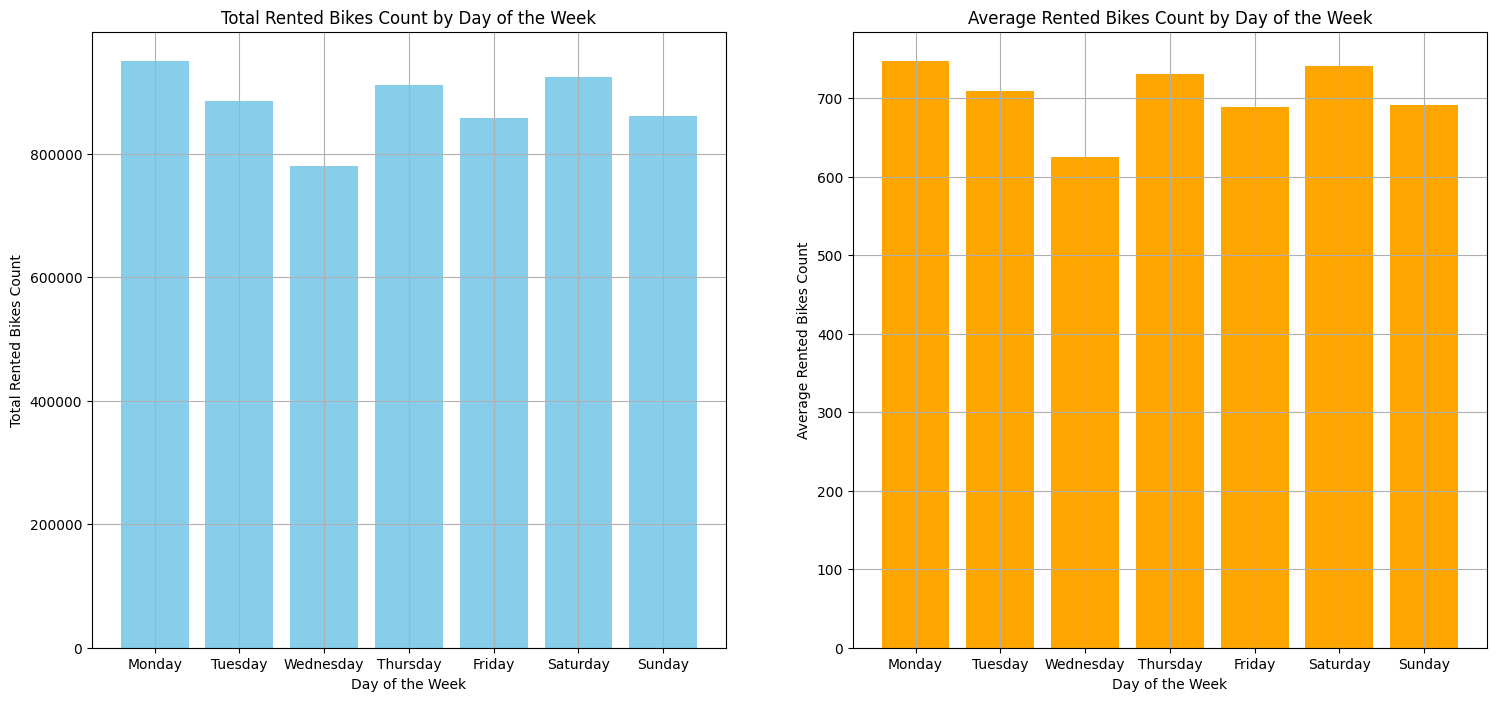

In [268]:
data = pd.concat([SeoulBikeData_transformed_target, SeoulBikeData_transformed_features['Week Day']], axis=1)

daily_sum = data.groupby('Week Day')['Rented Bike Count'].sum()
dayly_mean = data.groupby('Week Day')['Rented Bike Count'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
axes = axes.flatten()
axes[0].bar(daily_sum.index, daily_sum, color='skyblue')
axes[0].set_title('Total Rented Bikes Count by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Total Rented Bikes Count')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[0].grid(True)
axes[1].bar(dayly_mean.index, dayly_mean, color='orange')
axes[1].set_title('Average Rented Bikes Count by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Average Rented Bikes Count')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes[1].grid(True)
plt.show()


Let's combine some variables and drop some features to make a multiple regression 

In [269]:
SeoulBikeData_transformed['TempHum'] = SeoulBikeData_transformed['Temperature(°C)'] * SeoulBikeData_transformed['Humidity(%)'] 
SeoulBikeData_transformed['RainSnow'] = SeoulBikeData_transformed['Rainfall(mm)'] * SeoulBikeData_transformed['Snowfall (cm)']


In [270]:
X_features = SeoulBikeData_transformed[['Month', 'Week Day','TempHum', 'Wind speed (m/s)','RainSnow','Seasons', 'Holiday']]
y_target = SeoulBikeData_transformed['Rented Bike Count']


In [271]:
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 429.4971740636617
Mean Squared Error: 334334.49906535074
Root Mean Squared Error: 578.2166540885438
